### Agent-Lab: Adaptive RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [Adaptive RAG Agent](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_adaptive_rag/).

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    OLLAMA_ENDPOINT="http://localhost:11434"
    OLLAMA_MODEL_TAG="mistral-small:24b"
    XAI_API_KEY="???"
    XAI_MODEL_TAG="grok-2-1212"
    ```

---

In [ ]:
import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from langchain import globals
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# enable langchain debug
# globals.set_debug(True)
globals.set_verbose(True)

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
# agent_id = experiment_utils.create_ollama_agent(
#     agent_type="adaptive_rag",
#     llm_tag=os.getenv("OLLAMA_MODEL_TAG"),
#     ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
#)

agent_id = experiment_utils.create_xai_agent(
    agent_type="adaptive_rag",
    llm_tag=os.getenv("XAI_MODEL_TAG"),
    api_key=os.getenv("XAI_API_KEY")
)

In [3]:
# get agent instance
adaptive_rag_agent = container.adaptive_rag_agent()

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

# Create Graph
workflow_builder = adaptive_rag_agent.get_workflow_builder(agent_id)
workflow = workflow_builder.compile(checkpointer=checkpointer)

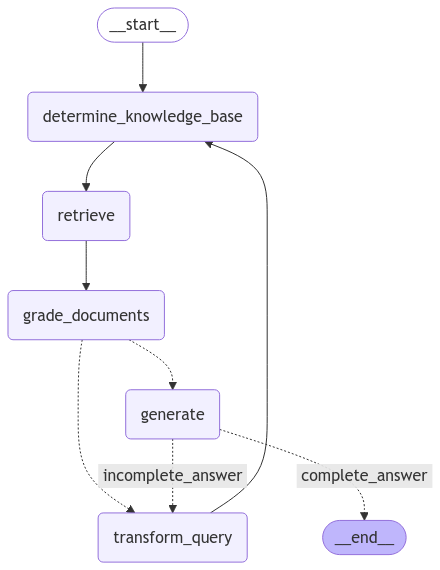

In [4]:
experiment_utils.print_graph(workflow)

In [5]:
# get document repository instance and populate vectorstore with documents
# document_repository = container.document_repository()
# experiment_utils.create_static_document(
#     embeddings_model=adaptive_rag_agent.get_embeddings_model(agent_id),
#     document_repository=document_repository,
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip"
# )

In [6]:
agent_config = {
    "configurable": {
        "thread_id": agent_id,
    },
    "recursion_limit": 10
}

In [ ]:
message_content = (
    "You have access to this book 'The Art of War - Sun Tzu' available at static_document_data, "
    "According to the book, what is the pinnacle of excellence? "
)

message = MessageRequest(
    message_role="human",
    message_content=message_content,
    agent_id=agent_id
)

inputs = adaptive_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [8]:
print(result['generation'])

According to 'The Art of War' by Sun Tzu, the pinnacle of excellence is to subdue the enemy without fighting. This concept is not directly mentioned in the provided context, but it is a well-known principle from the book.


In [9]:
message_content = (
    "Can you repeat my previous question about the art of war and answer it again but this time in dutch?"
)

message = MessageRequest(
    message_role="human",
    message_content=message_content,
    agent_id=agent_id
)

inputs = adaptive_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [10]:
print(result['generation'])

Uw vorige vraag ging over het hoogtepunt van uitmuntendheid volgens 'De Kunst van het Oorlogvoeren' van Sun Tzu. Het antwoord is: het hoogtepunt van uitmuntendheid is de vijand te onderwerpen zonder te vechten.
